In [1]:
#!pip install autokeras

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import autokeras as ak

## Load dataset

### Load from tensorflow

In [3]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Load from local directory

In [4]:
def load_data(directory, width=28, height=28, color_mode='grayscale', train_size=0.8):
    dataset = tf.keras.preprocessing.image_dataset_from_directory(
        directory, image_size=(width, height), color_mode=color_mode, batch_size=None)
    images, labels = zip(*dataset.as_numpy_iterator())
    images = np.array(images); labels = np.array(labels)
    x_train, x_test, y_train, y_test = train_test_split(images, labels, train_size=train_size)
    if color_mode == 'grayscale':
        x_train_count, width, height, depth = x_train.shape
        x_train = x_train.reshape(x_train_count, width, height)
        x_test_count, width, height, depth = x_test.shape
        x_test = x_test.reshape(x_test_count, width, height)
    return (x_train, y_train), (x_test, y_test)
(x_train, y_train), (x_test, y_test) = load_data('train', width=28, height=28)

Found 17000 files belonging to 10 classes.


## End Load dataset

In [5]:
print(x_train.shape)
print(y_train.shape)
print(y_train[:10])

(13600, 28, 28)
(13600,)
[0 4 8 4 7 9 5 7 0 8]


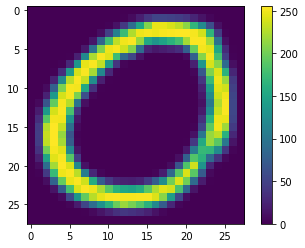

In [6]:
plt.figure()
plt.imshow(x_train[0].astype('uint8'))
plt.colorbar()
plt.grid(False)
plt.show()

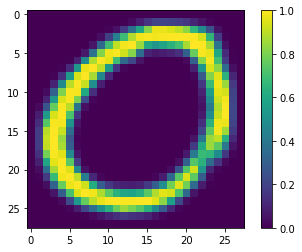

In [7]:
x_train = x_train / 255.0
x_test = x_test / 255.0
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
clf = ak.ImageClassifier(max_trials=1)
clf.fit(x_train, y_train, epochs=3)
print(clf.evaluate(x_test, y_test))

INFO:tensorflow:Reloading Oracle from existing project .\image_classifier\oracle.json
INFO:tensorflow:Reloading Tuner from .\image_classifier\tuner0.json
INFO:tensorflow:Oracle triggered exit
Epoch 1/3
425/425 [==============================] - 9s 21ms/step - loss: 0.2585 - accuracy: 0.9153
Epoch 2/3
425/425 [==============================] - 9s 22ms/step - loss: 0.0742 - accuracy: 0.9765
Epoch 3/3
425/425 [==============================] - 10s 22ms/step - loss: 0.0526 - accuracy: 0.9835
INFO:tensorflow:Assets written to: .\image_classifier\best_model\assets
107/107 [==============================] - 1s 6ms/step - loss: 0.0536 - accuracy: 0.9850
[0.05359981209039688, 0.9850000143051147]


107/107 [==============================] - 1s 6ms/step


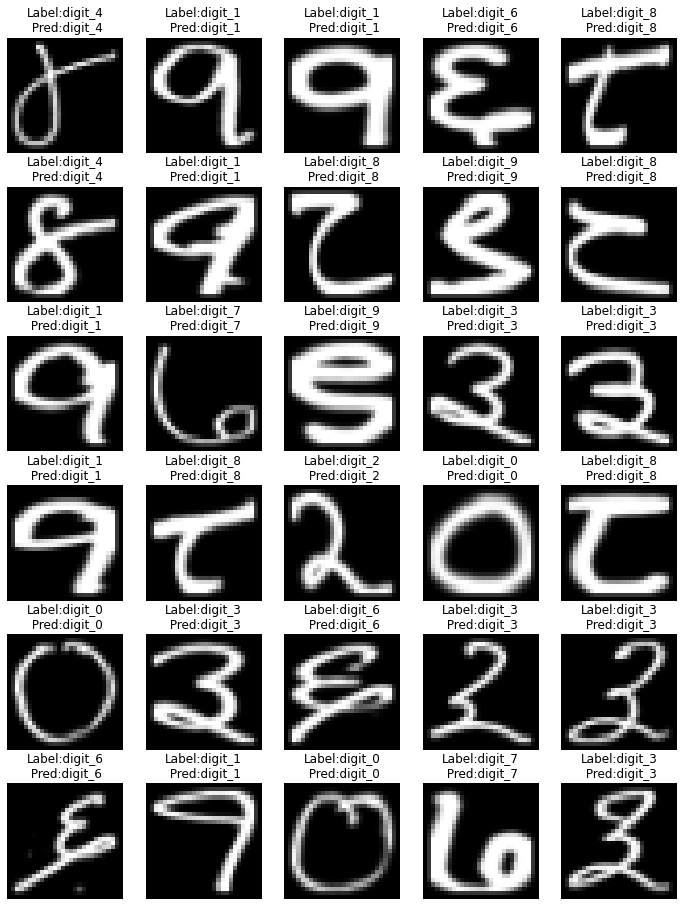

In [10]:
y_pred = clf.predict(x_test)

class_names = ['digit_0', 'digit_1', 'digit_2', 'digit_3', 'digit_4',
               'digit_5', 'digit_6', 'digit_7', 'digit_8', 'digit_9']
plt.figure(figsize=(12,16))
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.imshow(x_test[i], cmap='gray', interpolation='none')
    plt.title("Label:{}\n Pred:{}".format(
        class_names[y_test[i]], class_names[int(y_pred[i][0])]))
    plt.axis('off')